In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy import signal

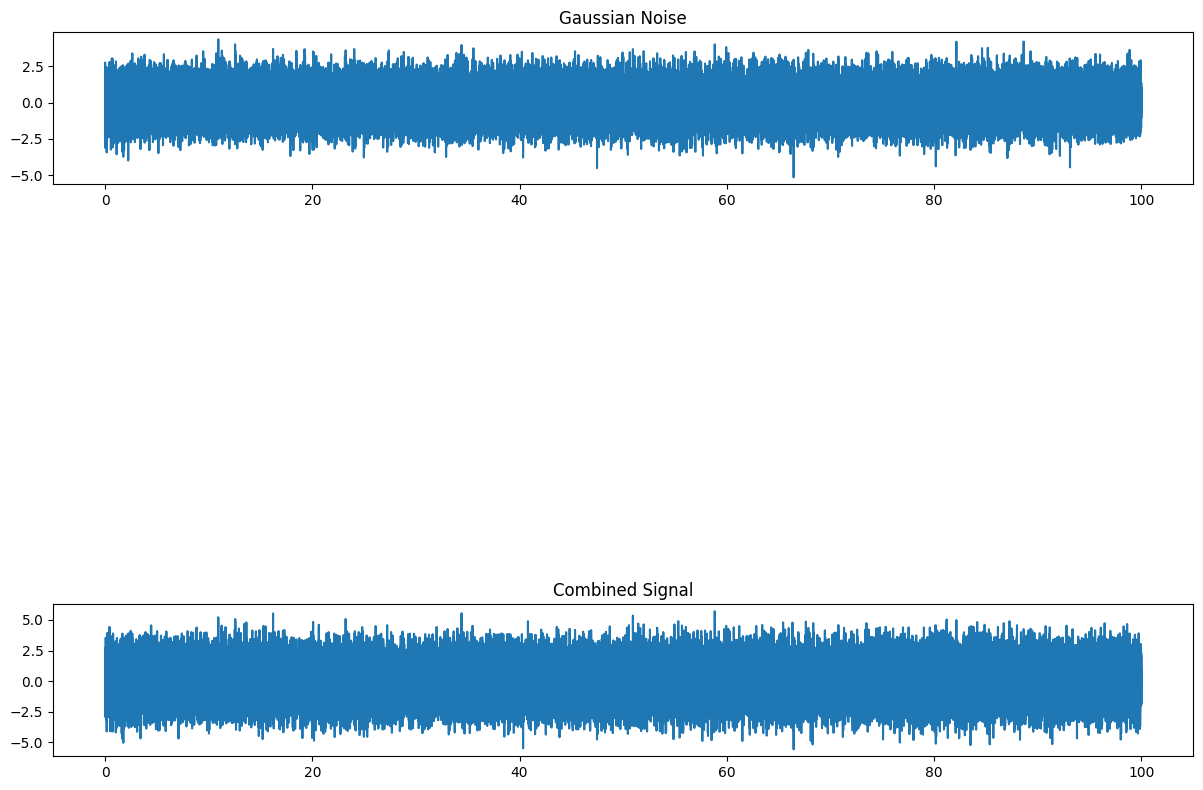

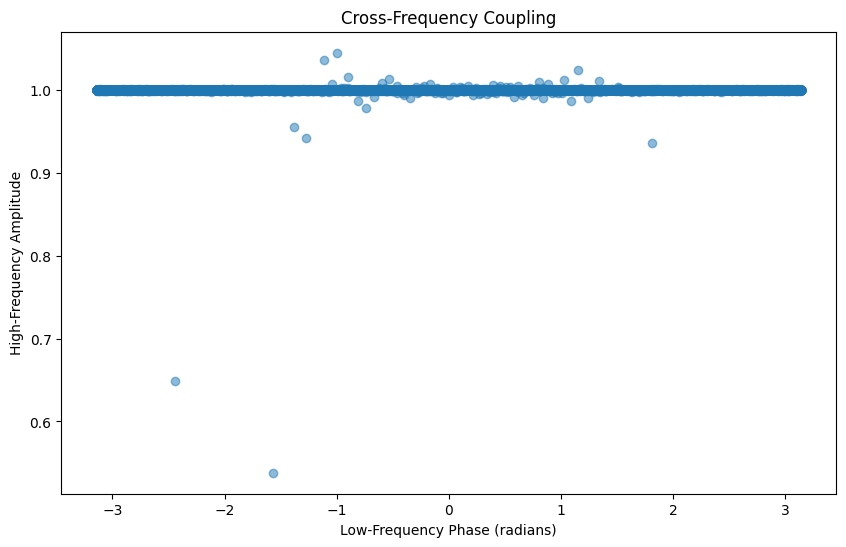

In [21]:
duration = 100  # seconds
sampling_rate = 1000  # Hz
num_samples = int(duration * sampling_rate)

# Generate Gaussian noise
noise = np.random.normal(0, 1, num_samples)

# Create a time vector
time = np.arange(0, duration, 1/sampling_rate)

# Low-frequency band (5-7 Hz)
low_freq_band = (5, 7)
low_freq_signal = np.sin(2 * np.pi * np.random.uniform(low_freq_band[0], low_freq_band[1]) * time)

# High-frequency band (80-120 Hz)
high_freq_band = (80, 120)
high_freq_signal = np.sin(2 * np.pi * np.random.uniform(high_freq_band[0], high_freq_band[1]) * time)

# Combine noise, low-frequency, and high-frequency signals
combined_signal = noise + low_freq_signal + high_freq_signal

# Hilbert transform to obtain instantaneous phase and amplitude
hilbert_low = hilbert(low_freq_signal)
hilbert_high = hilbert(high_freq_signal)

# Compute the phase of the low-frequency signal
phase_low = np.angle(hilbert_low)

# Compute the amplitude envelope of the high-frequency signal
amplitude_high = np.abs(hilbert_high)

# Plot the signals
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time, noise)
plt.title('Gaussian Noise')
plt.subplot(4, 1, 4)
plt.plot(time, combined_signal)
plt.title('Combined Signal')
plt.tight_layout()
plt.show()

# Plot CFC
plt.figure(figsize=(10, 6))
plt.scatter(phase_low, amplitude_high, alpha=0.5)
plt.title('Cross-Frequency Coupling')
plt.xlabel('Low-Frequency Phase (radians)')
plt.ylabel('High-Frequency Amplitude')
plt.show()


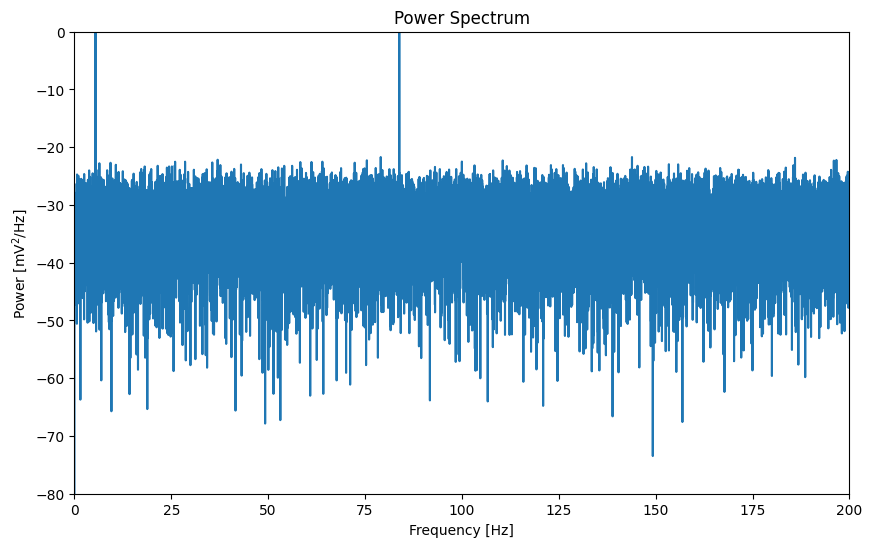

Power in the low-frequency band (5-7 Hz): 12.796492334085743 dB/Hz
Power in the high-frequency band (80-120 Hz): 13.446351871342717 dB/Hz


In [22]:
dt = time[1] - time[0]                # Define the sampling interval,
T = time[-1] - time[0]                # ... the duration of the data,
N = len(combined_signal)             # ... and the no. of data points

x = np.hanning(N) * combined_signal   # Multiply data by a Hanning taper
xf = np.fft.rfft(x - x.mean())        # Compute Fourier transform
Sxx = 2 * dt**2 / T * (xf * np.conj(xf)) # Compute the spectrum
Sxx = np.real(Sxx)                    # Ignore complex components

df = 1 / T                            # Define frequency resolution,
fNQ = 1 / dt / 2                      # ... and Nyquist frequency.

faxis = np.arange(0, fNQ + df, df)    # Construct freq. axis

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(faxis, 10 * np.log10(Sxx))  # Plot spectrum vs freq.
plt.xlim([0, 200])                    # Set freq. range,
plt.ylim([-80, 0])                    # Set decibel range
plt.xlabel('Frequency [Hz]')          # Label the x-axis
plt.ylabel('Power [mV$^2$/Hz]')       # Label the y-axis
plt.title('Power Spectrum')
plt.show()

# Extract the low-frequency band (5-7 Hz)
low_freq_band_indices = np.where((faxis >= 5) & (faxis <= 7))[0]
power_low_freq_band = 10 * np.log10(np.sum(Sxx[low_freq_band_indices]))

# Extract the high-frequency band (80-120 Hz)
high_freq_band_indices = np.where((faxis >= 80) & (faxis <= 120))[0]
power_high_freq_band = 10 * np.log10(np.sum(Sxx[high_freq_band_indices]))

print(f'Power in the low-frequency band (5-7 Hz): {power_low_freq_band} dB/Hz')
print(f'Power in the high-frequency band (80-120 Hz): {power_high_freq_band} dB/Hz')

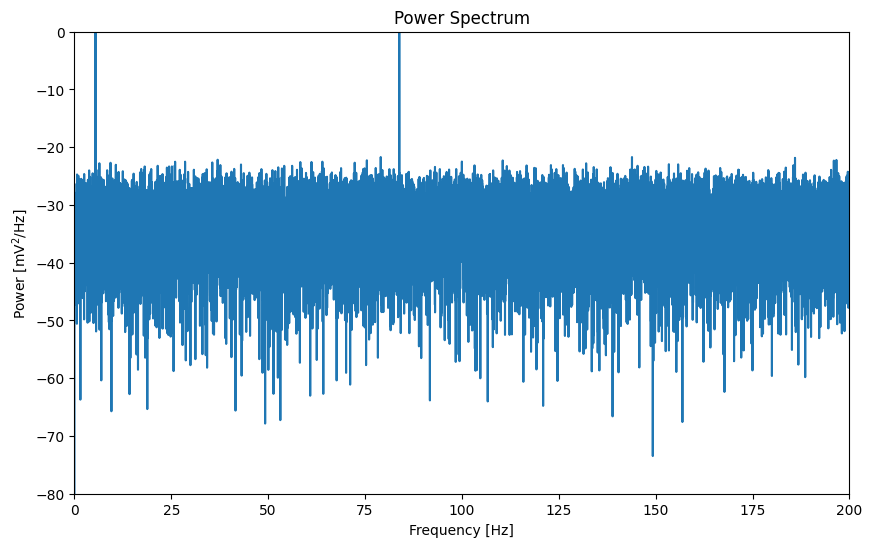

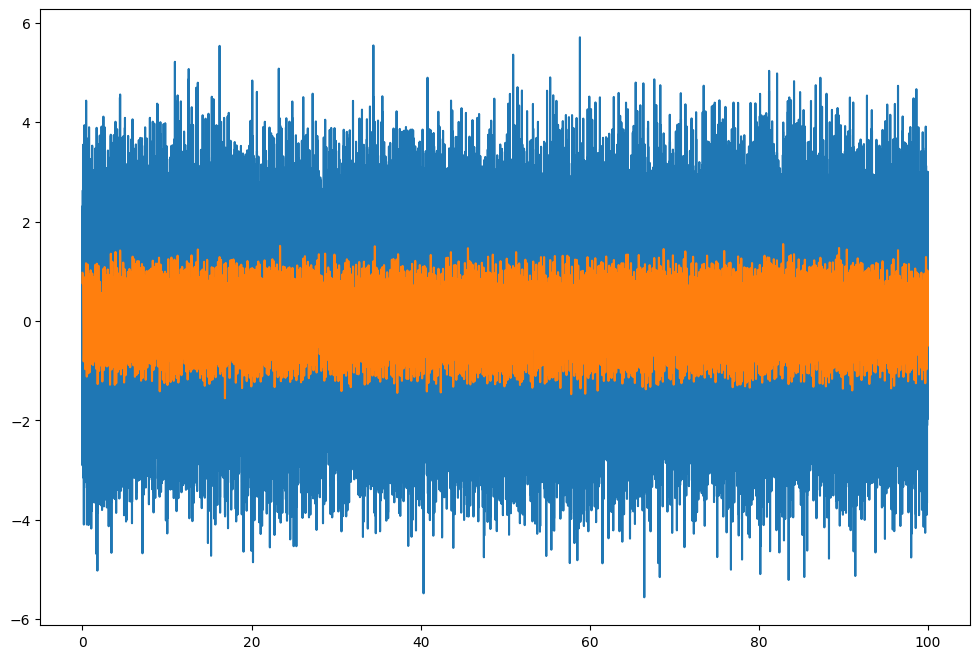

In [24]:
dt = time[1] - time[0]                # Define the sampling interval,
T = time[-1] - time[0]                # ... the duration of the data,
N = len(combined_signal)             # ... and the no. of data points

x = np.hanning(N) * combined_signal   # Multiply data by a Hanning taper
xf = np.fft.rfft(x - x.mean())        # Compute Fourier transform
Sxx = 2 * dt**2 / T * (xf * np.conj(xf)) # Compute the spectrum
Sxx = np.real(Sxx)                    # Ignore complex components

df = 1 / T                            # Define frequency resolution,
fNQ = 1 / dt / 2                      # ... and Nyquist frequency.

faxis = np.arange(0, fNQ + df, df)    # Construct freq. axis

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(faxis, 10 * np.log10(Sxx))  # Plot spectrum vs freq.
plt.xlim([0, 200])                    # Set freq. range,
plt.ylim([-80, 0])                    # Set decibel range
plt.xlabel('Frequency [Hz]')          # Label the x-axis
plt.ylabel('Power [mV$^2$/Hz]')       # Label the y-axis
plt.title('Power Spectrum')
plt.show()

# Apply bandpass filters
Wn_lo = [5, 7]                        # Set the passband for low-frequency band 
n_lo = 100                            # Filter order for low-frequency band
b_lo = signal.firwin(n_lo, Wn_lo, nyq=fNQ, pass_zero=False, window='hamming')
Vlo = signal.filtfilt(b_lo, 1, combined_signal)

Wn_hi = [75, 120]                      # Set the passband for high-frequency band
n_hi = 100                            # Filter order for high-frequency band
b_hi = signal.firwin(n_hi, Wn_hi, nyq=fNQ, pass_zero=False, window='hamming')
Vhi = signal.filtfilt(b_hi, 1, combined_signal)

# Plot the signals
plt.figure(figsize=(12, 8))
plt.plot(time, combined_signal, label='LFP')
plt.plot(time, Vlo, label='Low Filtered Freq')
